Image Classification of Custom-Images using Deep-Learning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os

In [13]:
ntw=cv2.imread('/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Train/no-wear tools/0001.jpg')

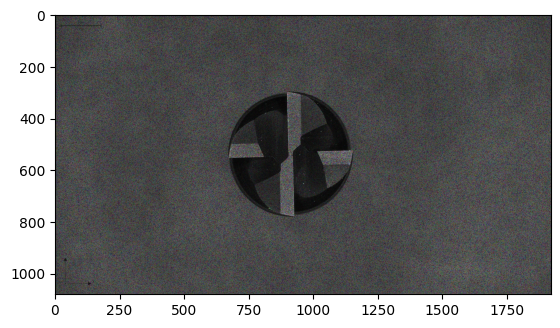

In [14]:
plt.imshow(ntw)

In [15]:
tw=cv2.imread('/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Train/wear tools/0001.jpg')


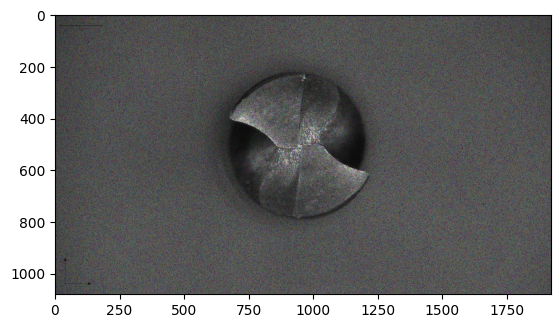

In [16]:
plt.imshow(tw)

In [17]:
ntw_rgb=cv2.cvtColor(ntw,cv2.COLOR_BGR2RGB)
tw_rgb=cv2.cvtColor(tw,cv2.COLOR_BGR2RGB)

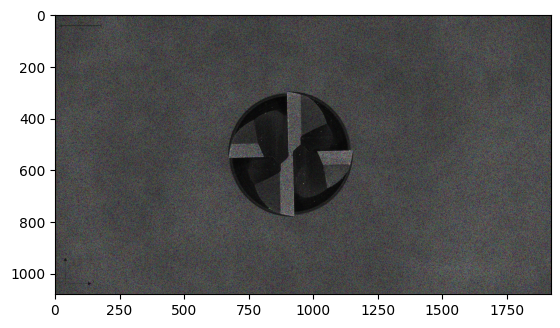

In [18]:
plt.imshow(ntw_rgb)

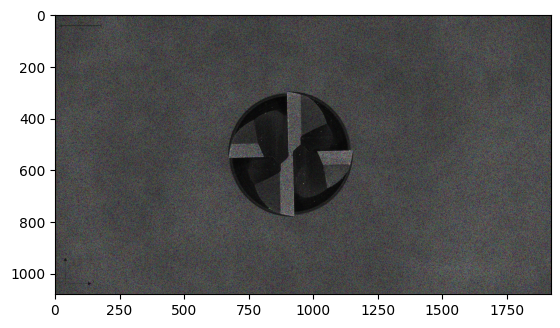

In [19]:
plt.imshow(ntw_rgb)

In [22]:
folder_path1='/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Train/no-wear tools'
folder_path2='/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Train/wear tools'
folder_path3='/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Test/no-wear tools'
folder_path4='/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Test/wear tools'

In [23]:
ntw_train_img=glob.glob(os.path.join(folder_path1,'*.jpg'))
tw_train_img=glob.glob(os.path.join(folder_path2,'*.jpg'))
ntw_test_img=glob.glob(os.path.join(folder_path3,'*.jpg'))
tw_test_img=glob.glob(os.path.join(folder_path4,'*.jpg'))

In [24]:
len(ntw_train_img)

2400

In [25]:
len(tw_train_img)

4000

In [26]:
len(ntw_test_img)

600

In [27]:
len(tw_test_img)

1000

In [28]:
from keras.preprocessing.image import ImageDataGenerator

In [29]:
image_gen=ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

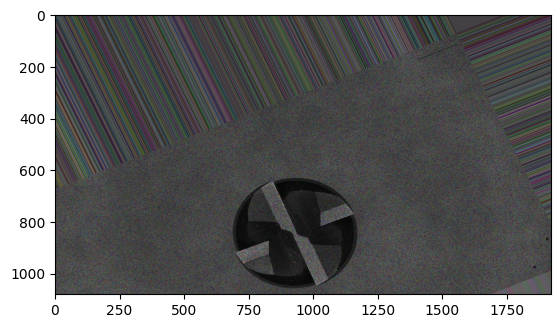

In [30]:
plt.imshow(image_gen.random_transform(ntw_rgb))

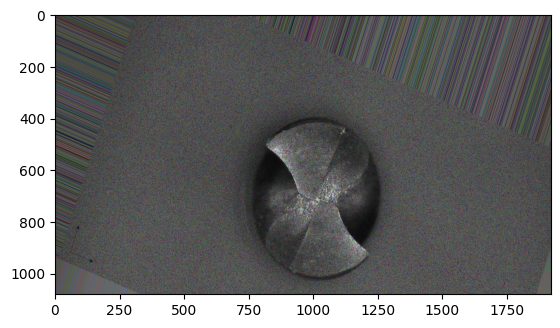

In [31]:
plt.imshow(image_gen.random_transform(tw_rgb))

In [32]:
image_gen.flow_from_directory('/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD')

Found 8000 images belonging to 2 classes.


In [33]:
image_shape=(150,150,3)
image_shape[:2]

(150, 150)

In [34]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense,Conv2D,MaxPooling2D

In [35]:
model=Sequential()

In [36]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [38]:
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [39]:
model.add(Flatten())

In [40]:
model.add(Dense(128))
model.add(Activation('relu'))

In [41]:
model.add(Dropout(0.5))

In [42]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [43]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
batch_size=20
train_image_gen=image_gen.flow_from_directory('/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Train',
                                              target_size=image_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='binary')

Found 6400 images belonging to 2 classes.


In [45]:
batch_size=16
test_image_gen=image_gen.flow_from_directory('/content/drive/MyDrive/Milling Tool Wear Dataset NJUST-CCTD/Tool_Wear_Test',
                                              target_size=image_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='binary')

Found 1600 images belonging to 2 classes.


In [46]:
train_image_gen.class_indices

{'no-wear tools': 0, 'wear tools': 1}

In [47]:
results=model.fit_generator(train_image_gen,epochs=20,
                            validation_data=test_image_gen)

<ipython-input-47-19126fe7afae>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results=model.fit_generator(train_image_gen,epochs=20,


Epoch 1/20
320/320 [==============================] - 3267s 10s/step - loss: 0.5752 - accuracy: 0.6775 - val_loss: 0.5242 - val_accuracy: 0.7344
Epoch 2/20
320/320 [==============================] - 204s 639ms/step - loss: 0.5279 - accuracy: 0.7212 - val_loss: 0.5256 - val_accuracy: 0.7275
Epoch 3/20
320/320 [==============================] - 205s 641ms/step - loss: 0.5048 - accuracy: 0.7425 - val_loss: 0.4747 - val_accuracy: 0.7619
Epoch 4/20
320/320 [==============================] - 201s 628ms/step - loss: 0.4822 - accuracy: 0.7642 - val_loss: 0.4620 - val_accuracy: 0.7837
Epoch 5/20
320/320 [==============================] - 217s 678ms/step - loss: 0.4438 - accuracy: 0.7889 - val_loss: 0.4081 - val_accuracy: 0.8156
Epoch 6/20
320/320 [==============================] - 204s 640ms/step - loss: 0.4234 - accuracy: 0.8030 - val_loss: 0.3684 - val_accuracy: 0.8313
Epoch 7/20
320/320 [==============================] - 202s 633ms/step - loss: 0.3923 - accuracy: 0.8189 - val_loss: 0.3759 - 

In [48]:
accuracy=results.history['accuracy']
val_accuracy=results.history['val_accuracy']

loss=results.history['loss']
val_loss=results.history['val_loss']

Text(0, 0.5, 'Accuracy')

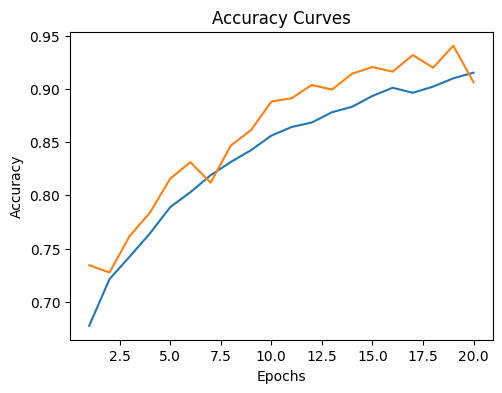

In [49]:
trained_epochs=len(results.history['accuracy'])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1, trained_epochs+1), accuracy, label='Training accuracy')
plt.plot(range(1, trained_epochs+1), val_accuracy, label='Validation accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

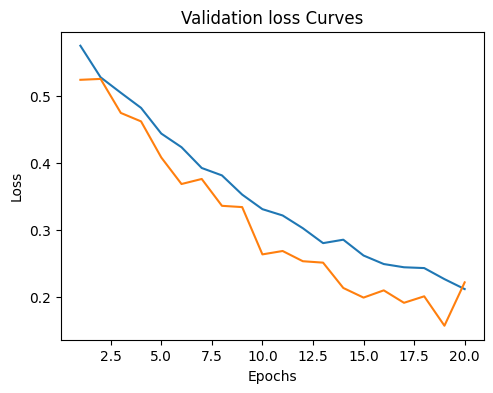

In [50]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1, trained_epochs+1), loss, label='Training loss')
plt.plot(range(1, trained_epochs+1), val_loss, label='Validation loss')
plt.title('Validation loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')